# Generate and visualize a GTM model  (Generative Topographic Map) using numpy and sklearn.

In [1]:
# this is our module containing all functions to generate a GTM model (download uGTM.py from github)
import uGTM;
import numpy as np;
import time;
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets;
from sklearn.cluster import AgglomerativeClustering;
from sklearn.decomposition import PCA;
import mpl_toolkits.mplot3d.axes3d as p3;
from yellowbrick.features import ParallelCoordinates;
from IPython.core.interactiveshell import InteractiveShell;
InteractiveShell.ast_node_interactivity = "all";

Two types of grids are generated to initialize the GTM model:
- the (square) grid of sample points (size = k*k)
- the (square) grid of RBF function centers (size = m*m)
Typically, m<k.

Two other parameters must be set to modulate the "smoothness" of the manifold:
- the regularization factor l 
- the RBF width factor s

For a total of four parameters: k, m, l, s.

The EM algorithm will optimize two "internal" parameters on its own:
- the inverse variance of the probability density function (betainv)
- the parameter (weight) matrix W


In [2]:
#parameters;
k=15;
m=4;
l=0.1;
s=1;

The data will be named "matT".
nMolecules is the number data points and nDimensions the dimensionality of the data.

Replace matT by your own data.

In [3]:
import csv
filenamedat = '/Users/hagax8/Documents/MATLAB/netlab3_3/csvlist.dat'
filenamelbls = '/Users/hagax8/Documents/MATLAB/netlab3_3/csvlist.lbls'
raw_data = open(filenamedat, 'rt')
reader = csv.reader(raw_data, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('float')
matT = data
raw_labels = open(filenamelbls, 'rt')
reader = csv.reader(raw_labels, delimiter=',', quoting=csv.QUOTE_NONE)
x = list(reader)
data = np.array(x).astype('int')
label = data - 1

matT = sklearn.preprocessing.scale(matT,axis=0, with_mean=True, with_std=True)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(matT)
matT = scaler.transform(matT)

matT2,label2 = sklearn.datasets.make_swiss_roll(n_samples=1500); 

#st = time.time()
#ward = AgglomerativeClustering(n_clusters=5, linkage='ward').fit(matT)
#elapsed_time = time.time() - st
#label = ward.labels_ 
#print("Elapsed time: %.2fs" % elapsed_time)
#print("Number of points: %i" % label.size)



In [4]:


#initialModel: gaussian mixture and swiss roll
initialModel = uGTM.initiliaze(matT,k,m,s,l)
initialModel2 = uGTM.initiliaze(matT2,k,m,s,l)

#optimizedModel: gausisan mixture and swiss roll
optimizedModel = uGTM.optimize(matT,initialModel,l,10)
optimizedModel2 = uGTM.optimize(matT2,initialModel2,l,10)






Iter  1  LogLikelihood:  -0.848185524852
Iter  2  LogLikelihood:  -0.924430260977
Iter  3  LogLikelihood:  -0.88856402543
Iter  4  LogLikelihood:  -0.841629556114
Iter  5  LogLikelihood:  -0.810974147288
Iter  6  LogLikelihood:  -0.792322547935
Iter  7  LogLikelihood:  -0.781973513956
Iter  8  LogLikelihood:  -0.77703304999
Iter  9  LogLikelihood:  -0.775075927341
Iter  10  LogLikelihood:  -0.774395710567
Iter  1  LogLikelihood:  -9.99579646465
Iter  2  LogLikelihood:  -9.91524631644
Iter  3  LogLikelihood:  -9.93252296145
Iter  4  LogLikelihood:  -9.90670518929
Iter  5  LogLikelihood:  -9.88238316471
Iter  6  LogLikelihood:  -9.85733465544
Iter  7  LogLikelihood:  -9.83104294668
Iter  8  LogLikelihood:  -9.80453527607
Iter  9  LogLikelihood:  -9.77868705778
Iter  10  LogLikelihood:  -9.75292132901


# PLOT ORIGINAL VS PROJECTED DATA: mixture of gaussians

(-0.8410747918454009,
 1.0140692990762779,
 -1.0009110406129933,
 1.0150248549244956)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

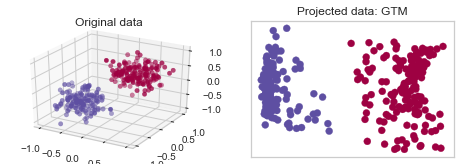

Computing LLE embedding
Done. Reconstruction error: 7.46331e-07


(-0.017639076744175908,
 0.09719480517351102,
 -0.24320915352460157,
 0.26363982464082303)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

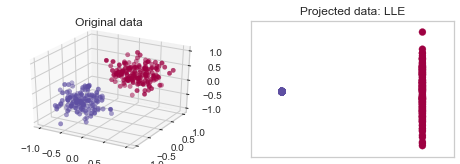

In [8]:
mm = optimizedModel.matMeans
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT[:, 0],matT[:, 1], matT[:, 2], c=label, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(mm[:, 0], mm[:, 1], c=label, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: GTM')
plt.show()

#compare with LLE

from sklearn import manifold

print("Computing LLE embedding")
matT_r, err = manifold.locally_linear_embedding(matT, n_neighbors=12,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)


fig = plt.figure()

ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT[:, 0], matT[:, 1], matT[:, 2], c=label, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(matT_r[:, 0], matT_r[:, 1], c=label, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: LLE')
plt.show()

# PLOT ORIGINAL VS PROJECTED DATA: swiss roll (GTM doesn't unfold the swiss roll, LLE does (but not always))

(-0.75079941223240443,
 0.63237114739333677,
 -0.87268624421450891,
 0.87648329499124933)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

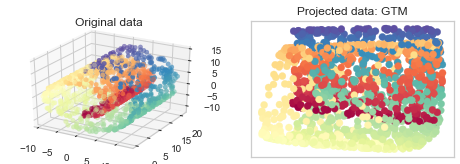

Computing LLE embedding
Done. Reconstruction error: 4.36931e-07


(-0.069272805014496786,
 0.058589955598740084,
 -0.080823909301079314,
 0.10724780649225675)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

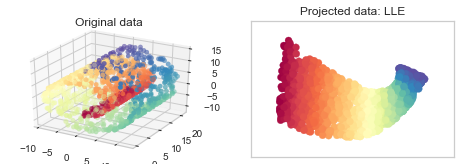

In [9]:
mm2 = optimizedModel2.matMeans
fig = plt.figure()
ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT2[:, 0],matT2[:, 1], matT2[:, 2], c=label2, cmap=plt.cm.Spectral)
ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(mm2[:, 0], mm2[:, 1], c=label2, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: GTM')
plt.show()


#compare with LLE

from sklearn import manifold
print("Computing LLE embedding")
matT2_r, err = manifold.locally_linear_embedding(matT2, n_neighbors=30,
                                             n_components=2)
print("Done. Reconstruction error: %g" % err)

fig = plt.figure()

ax = fig.add_subplot(221, projection='3d')
ax.scatter(matT2[:, 0], matT2[:, 1], matT2[:, 2], c=label2, cmap=plt.cm.Spectral)

ax.set_title("Original data")
ax = fig.add_subplot(222)
ax.scatter(matT2_r[:, 0], matT2_r[:, 1], c=label2, cmap=plt.cm.Spectral)
plt.axis('tight')
plt.xticks([]), plt.yticks([])
plt.title('Projected data: LLE')
plt.show()